In [2]:
import mne
import numpy as np
import scipy.io

# read .mat data file
file = scipy.io.loadmat('S1.mat')
data = file['data']
data.shape

(64, 1500, 40, 6)

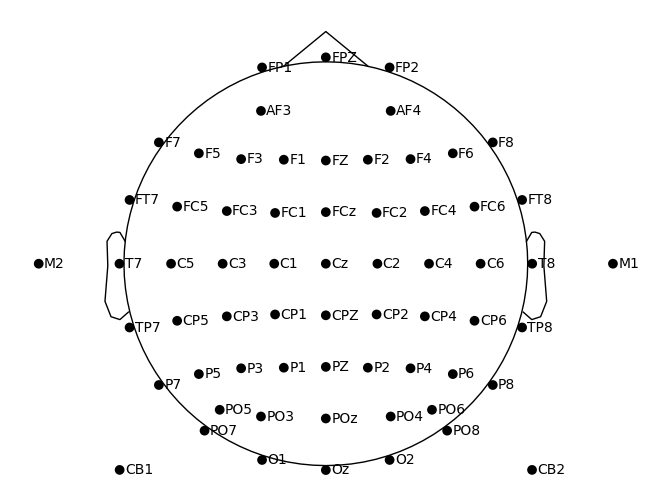

In [3]:
# read channel locations from file
montage = mne.channels.read_custom_montage('64-channels.loc')
plt = montage.plot()

In [4]:
# create mne info
n_channels = 64
sampling_freq = 250  # in Hertz
ch_types = ['eeg'] * 64

info = mne.create_info(montage.ch_names, sampling_freq, ch_types=ch_types)
info.set_montage(montage)
info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [5]:
# create epochs from file data
# reshape data to shape(n_epochs, n_channels, n_times)
# (64, 1500, 40, 6) -> (64, 1500, 240)
data_reshaped = data.reshape(data.shape[0], data.shape[1], -1)
# (64, 1500, 240) -> (240, 64, 1500)
data_reshaped = np.transpose(data_reshaped, (2, 0, 1))
data_reshaped.shape

(240, 64, 1500)

In [41]:
events = np.column_stack(
    (
        np.arange(0, 1500*240, 1500)+125,
        np.zeros(240, dtype=int),
        np.tile(np.arange(0, 40) + 1, 6),
    )
)

event_dict = {f"{8+0.2*(x-1):.1f}Hz": x for x in range(1, 41)}

epochs = mne.EpochsArray(data_reshaped/10e6, info, tmin=-0.5, events=events, event_id=event_dict)
epochs

Not setting metadata
240 matching events found


: 

In [30]:
a = np.arange(8,15.8+0.2,0.2)

array([ 8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ,
       10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2,
       12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4,
       14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8])

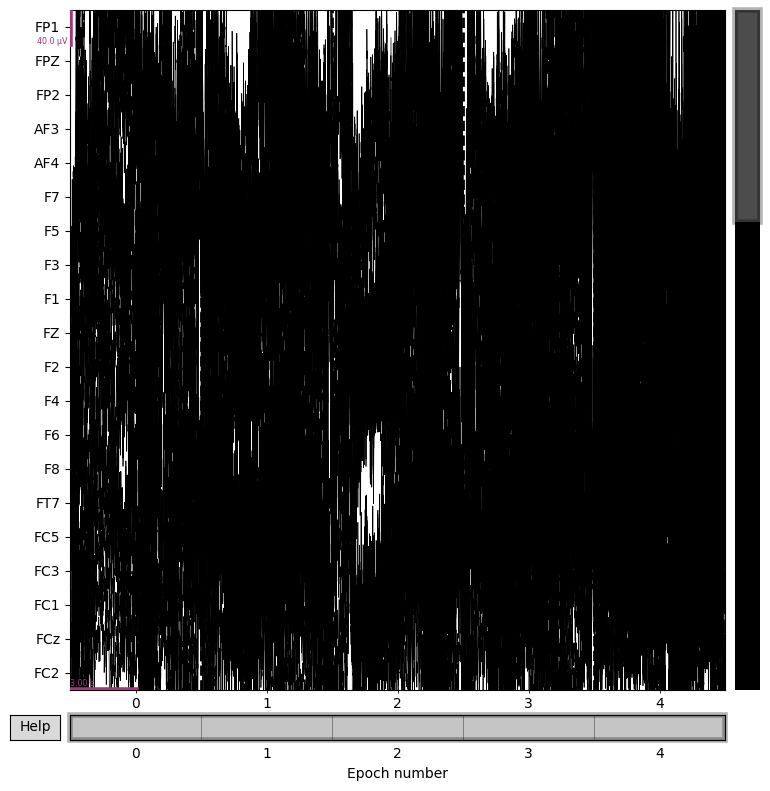

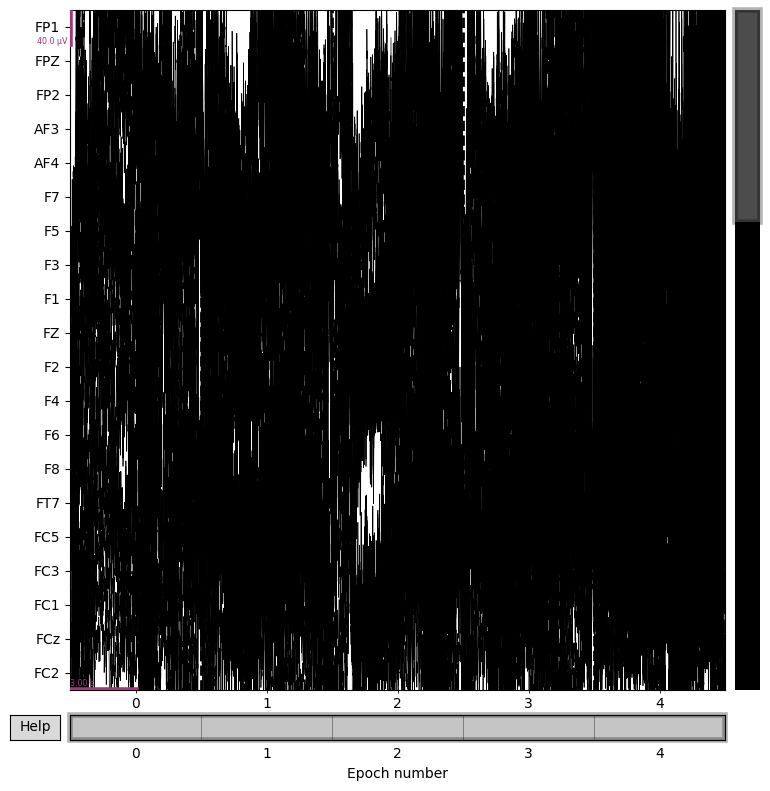

: 

In [18]:
epochs[:5].plot()